In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import cufflinks as cf

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as po

orig_df = pd.read_csv("winning_booths_data.csv")

top_categories = ['No Category', 'Fashion', 'Home & Garden', 'Health & Beauty', 'Parts & Accessories', 'Jewelry & Watches']
df = orig_df[orig_df.featured_category_id.isin(top_categories)]
value_em = [whale, dolphin, sea_bass, minnow]

In [6]:
tls.set_credentials_file(username='kevinbigfoot',api_key='fC6dwyjUkFPLiUxzMkw8')


In [7]:
whale = df[df.value_em == 'WHALE']
minnow = df[df.value_em == 'MINNOW']
sea_bass = df[df.value_em == 'SEA_BASS']
dolphin = df[df.value_em == 'DOLPHIN']



In [8]:
size = 1000
for value in value_em:
    if len(value) < size:
        size = len(value)

sample_whale = whale.sample(size)
sample_dolphin = dolphin.sample(size)
sample_sea_bass = sea_bass.sample(size)
sample_minnow = minnow.sample(size)

In [9]:
whale = sample_whale.groupby(['featured_category_id']).sum()
dolphin = sample_dolphin.groupby(['featured_category_id']).sum()
sea_bass = sample_sea_bass.groupby(['featured_category_id']).sum()
minnow = sample_minnow.groupby(['featured_category_id']).sum()
whale.columns

Index(['id', 'profit_estimate', 'days_to_sale', 'days_as_user',
       'profit_per_day', 'orders', 'd_per_order', 'source_em',
       'items_for_sale', 'view_count', 'offers', 'membership_level',
       'feedback', 'rate', 'rating'],
      dtype='object')

In [92]:
whale_pd = whale[['profit_per_day', 'days_as_user']]

In [35]:
#simple line chart
py.plot([{
    'x' : whale.index,
    'y' : whale.profit_estimate
}])

'https://plot.ly/~kevinbigfoot/6'

In [37]:
#2 columns line chart
py.plot([{
    'x' : whale_pd.index,
    'y' : whale_pd[col]
} for col in whale_pd.columns])

NameError: name 'orders_pd' is not defined

In [12]:
#Simple Scatter Plot
data = [go.Scatter(
    x = df.days_as_user,
    y = df.profit_per_day,
    mode = 'markers',
    marker = dict(
        size=14,
        color = 'rgb(120,150,180)',
        symbol = 'square',
        line = dict(
            width=2,
        )
    )
    )]

In [13]:
layout = go.Layout(
    title = 'Profit over Days Chart',
    xaxis = dict(title = 'Days as User'),
    yaxis = dict(title = 'Profit'),
    hovermode = 'closest'
)

figure = go.Figure(data=data, layout = layout)

In [14]:
py.plot(figure)

'https://plot.ly/~kevinbigfoot/20'

In [93]:
order_value_em = pd.pivot_table(df, values='profit_estimate', index='value_em')
print(order_value_em.values)

[[1466.2102981 ]
 [ 148.2120982 ]
 [ 362.05150215]
 [6774.2972973 ]]


In [94]:
data = [go.Bar(
                x = order_value_em.index, y=order_value_em.values, name='Profit By Category'
)]

layout = go.Layout(title = 'Profit By Category')


In [95]:
figure = go.Figure(data=data, layout = layout)

In [96]:
po.plot(figure)

'file:///Users/bonanza/data_analysis/temp-plot.html'

NameError: name 'value_df' is not defined

In [6]:
a = df.days_as_user
b = df.profit_estimate

trace = go.Scatter(x=a, y=b, )

data = [trace]

py.iplot(data, file='profit_over_days_as_user')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kevinbigfoot/0 or inside your plot.ly account where it is named 'plot from API'


In [7]:
x=[1,2,3,4,5,6,7,8,9]
y=[1,2,3,4,0,4,3,2,1]
z=[9,8,7,6,5,4,3,2,1]

trace0= go.Scatter(x=x,y=y,name='List Object', line=dict(width=5))
trace1= go.Scatter(x=x,y=z,name='List Object2', line=dict(width=10))

data = [trace0, trace1]

layout = dict(title='Double Line Chart', xaxis = dict(title='x-axis'), yaxis = dict(title='y-axis'))

In [9]:
fig = dict(data=data, layout=layout)

In [10]:
py.iplot(fig, filename="style_line_chart")

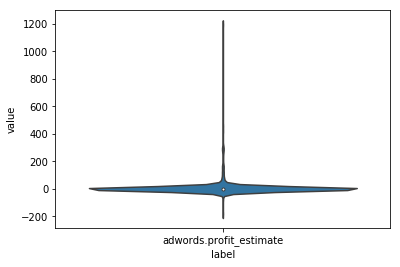

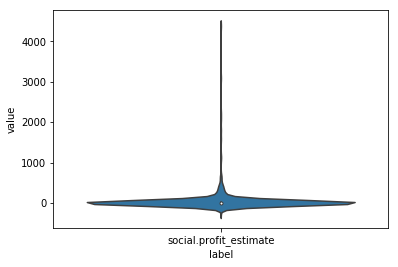

In [6]:
n= 750
value_df = pd.DataFrame({
    "label": ["whale.profit_estimate"] * n + ["dolphin.profit_estimate"] * n + ["sea_bass.profit_estimate"] * n + ["minnow.profit_estimate"] * n,
    "value": np.concatenate([whale.profit_estimate, dolphin.profit_estimate, sea_bass.profit_estimate, minnow.profit_estimate])
})


ValueError: arrays must all be same length